### Machine Learning with Big Data
## Part 1: Fully Connected Layers

# 0.4 - evaluate best model

**Group:** MLBD_Deventer 4
**Students:** Mathijs Pattipeilohy (512391), Emin Fikret (511275)

if you run the model you will see that it follows as much of a diagonal line as possible. the test data just has a lot more nothing and one pairs so there will also be more errors in that but compared to how much it gets correctly its still very accurate

final test accuracy 0.9988136887550354


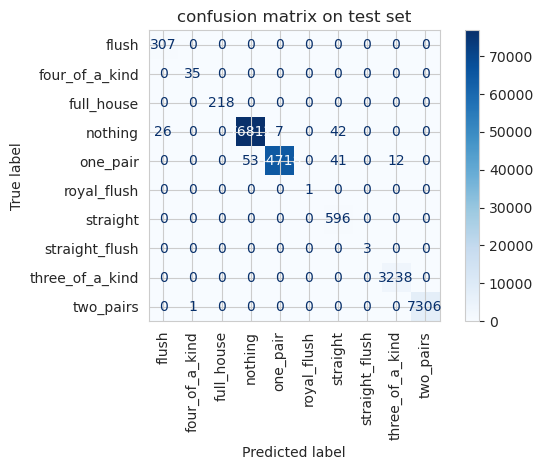

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
import pandas as pd

# load meta and model
with open('../artifacts/metadata.json') as f:
    meta = json.load(f)
labels = meta['label_classes']
num_classes = len(labels)
model = keras.models.load_model('../artifacts/best_so_far.keras')

# load test
X_test = np.load('../artifacts/X_test.npy')
y_test = np.load('../artifacts/y_test.npy')

# one hot labels
y_test_oh = keras.utils.to_categorical(y_test, num_classes)

# eval
loss, acc = model.evaluate(X_test, y_test_oh, batch_size=1024, verbose=0)
print('final test accuracy', acc)

# confusion matrix save and show
y_pred = model.predict(X_test, batch_size=4096, verbose=0).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title('confusion matrix on test set')
os.makedirs('../artifacts', exist_ok=True)
plt.tight_layout()
plt.savefig('../artifacts/test_confusion_matrix.png', dpi=150)
plt.show()
